# Un modello di previsione per il mercato immobiliare

RealEstateAI Solutions si propone di ottimizzare la valutazione dei prezzi immobiliari attraverso l'uso di tecniche avanzate di regolarizzazione in modelli di regressione lineare. L'obiettivo è fornire previsioni di prezzo più accurate e affidabili, riducendo il rischio di overfitting e migliorando la capacità di generalizzazione del modello.

RealEstateAI Solutions si propone di ottimizzare la valutazione dei prezzi immobiliari attraverso l'uso di tecniche avanzate di regolarizzazione in modelli di regressione lineare. L'obiettivo è fornire previsioni di prezzo più accurate e affidabili, riducendo il rischio di overfitting e migliorando la capacità di generalizzazione del modello.

Implementando e confrontando metodi di regolarizzazione come Lasso, Ridge e Elastic Net, RealEstateAI Solutions offrirà un sistema in grado di fornire previsioni di prezzo immobiliari più accurate e stabili. Questo permetterà agli agenti immobiliari e agli investitori di prendere decisioni basate su dati più affidabili, aumentando la loro competitività nel mercato.

# Requisiti del progetto

## Fasi del Progetto

### Preparazione del Dataset
- Caricamento e preprocessamento dei dati sui prezzi immobiliari.
- Gestione dei valori mancanti, codifica delle variabili categoriche e normalizzazione/scalatura dei dati.

### Implementazione dei Modelli di Regressione
- **Ridge Regression:** Implementazione e addestramento del modello con regolarizzazione Ridge.
- **Lasso Regression:** Implementazione e addestramento del modello con regolarizzazione Lasso.
- **Elastic Net Regression:** Implementazione e addestramento del modello con regolarizzazione Elastic Net.

### Valutazione delle Performance
- Utilizzo di tecniche di validazione incrociata.
- Calcolo del **Mean Squared Error (MSE)** per ciascun modello.
- Confronto della complessità dei modelli valutando il numero di coefficienti non nulli.
- Analisi e confronto dei risultati dei vari metodi di regolarizzazione.

### Visualizzazione dei Risultati
- Creazione di grafici per visualizzare e confrontare le performance dei modelli.
- Visualizzazione della distribuzione dei residui per valutare l'adeguatezza del modello.

## Il Dataset

* Price: il prezzo, il target da prevedere
* Area: superficie dell’immobile - continuous
* Bedrooms: numero di camere da letto - continuous
* Bathrooms: numero di bagni - continuous
* Stories: numero di piani - continuous
* Mainroad: vale 1 se l’immobile affaccia su una strada principale, 0 altrimenti - ohe
* guestroom: vale 1 se l’immobile ha una stanza degli ospiti, 0 altrimenti - ohe
* basement: vale 1 se l’immobile ha un seminterrato, 0 altrimenti - ohe
* hotwaterheating: vale 1 se l’immobile ha una caldaia, 0 altrimenti - ohe
* airconditioning: vale 1 se l’immobile ha l’aria condizionata, 0 altrimenti - ohe
* parking: numero di parcheggi - ordinal
* prefarea: vale 1 se l’immobile è in una zona prestigiosa, 0 altrimenti - ohe
* Furnishingstatus: vale 0 se l’immobile non è arredato, 1 se è parzialmente arredato, 2 se è completamente arredato - ordinal

# Implementazione

Il progetto implementa un'analisi avanzata per il **mercato immobiliare**, con l'obiettivo di prevedere i prezzi delle proprietà utilizzando modelli di regressione e tecniche di regolarizzazione.

## Importazione e gestione dei prerequisiti e delle dipendenze

Descrizione

In [ ]:
# Dependencies

# General

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn Metrics

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
sns.set_theme(style="whitegrid")

## Importazione del Dataset

Il dataset rappresenta un insieme di osservazioni di unità immobiliari. Il dataset traccia alcune features caratteristiche di un immobile, come:

* Area: superficie dell’immobile
* Bedrooms: numero di camere da letto
* Bathrooms: numero di bagni
* Stories: numero di piani
* Mainroad: vale 1 se l’immobile affaccia su una strada principale, 0 altrimenti
* guestroom: vale 1 se l’immobile ha una stanza degli ospiti, 0 altrimenti
* basement: vale 1 se l’immobile ha un seminterrato, 0 altrimenti
* hotwaterheating: vale 1 se l’immobile ha una caldaia, 0 altrimenti
* airconditioning: vale 1 se l’immobile ha l’aria condizionata, 0 altrimenti
* parking: numero di parcheggi
* prefarea: vale 1 se l’immobile è in una zona prestigiosa, 0 altrimenti
* Furnishingstatus: vale 0 se l’immobile non è arredato, 1 se è parzialmente arredato, 2 se è completamente arredato

e ne traccia il relativo prezzo, che è la nostra variabile target.

Non potendo contare su una conoscenza di dominio specifica e non potendo effettuare ulteriori analisi sui dati, i dati verranno analizzati direttamente come forniti. Di seguito carichiamo il dataset e ne mostriamo un estratto:

In [ ]:
df = pd.read_csv('data/housing.csv')

df.head(10)

## Preparazione del dataset

Verranno immediatamente applicate alcune tecniche di riduzione della dimensionalità, come la feature selection tramite matrice di correlazione. Questo ci consentirà di rimuovere dati superflui e poco informativi.

Le features sono tutte di tipo numerico, e sono quindi confrontabili direttamente tramite coefficiente di Pearson:

In [ ]:
# Feature Correlation Analysis for numerical variables

plt.figure(figsize=(15, 8))

sns.heatmap(df.corr(method="pearson"), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Dall'analisi della matrice sopra mostrata, le features sembrano avere quasi tutte un impatto quantomeno discreto sul target. 

Fa eccezione la feature "hotwaterheating", che possiede una *bassa* correlazione non solo con il prezzo, ma anche con le altre. Considerando che, almeno usualmente, se l'immobile non possiede una caldaia il riscaldamento è di tipo centralizzato (influendo intuitivamente poco sul prezzo di acquisto/affitto), essa viene rimossa dal dataset:

In [ ]:
df = df.drop(['hotwaterheating'], axis=1)

Verranno effettuati ulteriori passaggi di feature selection più avanti, tramite regolarizzazione post-fitting dei modelli di regressione che verranno prodotti.

### Verifica della distribuzione del target

In [ ]:
sns.boxplot(df["price"])
plt.title("Distribuzione del target")
plt.show()

### Analisi dei valori NA e Null del dataset

Viene ora effettuata un'analisi sui dati mancanti: 

In [ ]:
df.isna().sum()

Dati i risultati della funzione isna() di Pandas, si può affermare che il dataset non ne riporta. Non è quindi necessario effettuare imputazioni o rimozioni di features/osservazioni particolari.

### Train-test Split

Per evitare il data leakage, prima di qualsiasi modifica ai dati del dataset, viene effettuato un primo passaggio di Hold-Out per separare il train set dal test set.

In [ ]:
X = df.drop('price', axis = 1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Verifica di outliers e classi non bilanciate

In [ ]:
df.describe()

Analizzando il contenuto e i valori statistici calcolati sui dati, osserviamo un discreto numero di osservazioni lontane dal valore medio per alcune features numeriche:

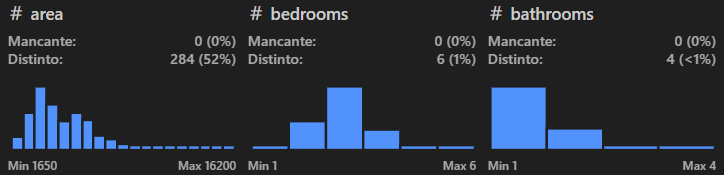

La rappresentazione delle distribuzioni sopra evidenziata conferma la presenza di classi sbilanciate. Tuttavia, essendo troppi pochi esempi, non risulta opportuno generare sample sintetici per bilanciarle.

### Analisi delle variabili categoriche e di trasformazioni possibili

Come già accennato in precedenza, il dataset riporta valori esclusivamente numerici. Non risultano necessarie quindi trasformazioni di variabili categoriche come il One-Hot Encoding o il Label Encoding.

### Analisi delle variabili numeriche e scaling

Risulta, invece, necessario effettuare lo scaling dei dati. Si opta per la standardizzazione, data la presenza di alcuni outliers verificata nei punti precedenti. Essa viene effettuata sulle variabili puramente numeriche e categoriche ordinali, poichè le features con due classi (codificate con LabelEncoding) non necessitano di tale operazione.

Il passaggio viene effettuato qui sotto per il dataset di Hold-Out. La funzione di cross-validation, invece, gestirà lo scaling con i dati non scalati che riceverà in ingresso.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train[X_train.columns] = ss.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = ss.transform(X_test[X_test.columns])

In [ ]:
X_train.describe()

## Creazione dei modelli di Regressione

Verranno ora creati e testati i modelli di regressione. Come da requisiti di progetto, verranno applicate le regolarizzazioni L2, L1 ed ElasticNet.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_val_score, KFold

Definiamo quindi le funzioni di cross-validation e di validazione dei modelli con metriche di MSE, R2 e RMSE:

In [ ]:
# Validazione delle performance del modello

def evaluate_model(model, dataset, message=None, delog=False, verbose=False):
    X, Y = dataset

    if delog:
        Y_pred = np.expm1(model.predict(X))
    else:
        Y_pred = model.predict(X)

    if verbose:
        if message:
            print(message)
            
        print("Primi 5 valori reali:", Y[:5])
        print("Primi 5 valori predetti:", Y_pred[:5])

        print("\n")

        print(f"MSE: {mse}")
        print(f"R2: {r2}")
        print(f"RMSE: {rmse}")
        print("\n")
    
    mse = mean_squared_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)
    rmse = np.sqrt(mse)

    return mse, r2, rmse

In [ ]:
from sklearn.pipeline import Pipeline

def cross_validation(X, Y, cv=5, pipeline=None):

    kf = KFold(n_splits=cv, shuffle=True)

    train_mse = []
    train_r2 = []
    train_rmse = []

    test_mse = []
    test_r2 = []
    test_rmse = []

    if pipeline is None:
        model = Pipeline([
            ("lasso", Lasso())
        ])
    else:
        model = pipeline

    X = X.values
    Y = Y.values

    for train_index, test_index in kf.split(X):

        X_train_split, X_test_split = X[train_index], X[test_index]
        Y_train_split, Y_test_split = Y[train_index], Y[test_index]

        ss = StandardScaler()
        X_train_split = ss.fit_transform(X_train_split)
        X_test_split = ss.transform(X_test_split)

        model.fit(X_train_split, Y_train_split)
        
        mse_train, r2_train, rmse_train = evaluate_model(model, (X_train_split, Y_train_split))
        mse_test, r2_test, rmse_test = evaluate_model(model, (X_test_split, Y_test_split))

        train_mse.append(mse_train)
        train_r2.append(r2_train)
        train_rmse.append(rmse_train)

        test_mse.append(mse_test)
        test_r2.append(r2_test)
        test_rmse.append(rmse_test)
        
    return train_mse, train_r2, train_rmse, test_mse, test_r2, test_rmse

E definiamo ora una lista di differenti configurazioni dei tre metodi di regolarizzazione con diversi parametri di Lambda:

In [ ]:
# Model configurations

configs = [
    Ridge(),
    Ridge(alpha=10),
    Ridge(alpha=20),
    Ridge(alpha=30),
    Lasso(),
    Lasso(alpha=0.1),
    Lasso(alpha=0.5),
    Lasso(alpha=5),
    Lasso(alpha=10),
    Lasso(alpha=20),
    ElasticNet(),
    ElasticNet(alpha=3, l1_ratio=0.5),
    ElasticNet(alpha=5, l1_ratio=0.5)
]

Effettuiamo ora le validazioni incrociate di Cross Validation sull'intero dataset, e di Hold-out sullo split effettuato alla sezione Train-Test Split:

In [ ]:
for config in configs:
    print(f"Testing config {config} with cross-validation:\n")

    train_mse, train_r2, train_rmse, test_mse, test_r2, test_rmse = cross_validation(X, y, pipeline=config)

    print(f"Train Set MSE: {np.mean(train_mse)}")
    print(f"Train Set R2: {np.mean(train_r2)}")
    print(f"Train Set RMSE: {np.mean(train_rmse)}")

    print("\n")

    print(f"Test Set MSE: {np.mean(test_mse)}")
    print(f"Test Set R2: {np.mean(test_r2)}")
    print(f"Test Set RMSE: {np.mean(test_rmse)}")

    print("\n")

In [ ]:
for config in configs:
    print(f"Testing config {config} with hold-out:\n")

    model = config

    model.fit(X_train, y_train)

    mse_train, r2_train, rmse_train = evaluate_model(model, (X_train, y_train))
    mse_test, r2_test, rmse_test = evaluate_model(model, (X_test, y_test))

    print(f"Train Set MSE: {mse_train}")
    print(f"Train Set R2: {r2_train}")
    print(f"Train Set RMSE: {rmse_train}")

    print("\n")

    print(f"Test Set MSE: {mse_test}")
    print(f"Test Set R2: {r2_test}")
    print(f"Test Set RMSE: {rmse_test}")

    print("\n")

Le metriche sembrano mostrare risultati migliori per la regolarizzazione L1 (Lasso), che rimangono stabili anche testando diverse magnitudo di lambda.
Osserviamo, inoltre, che producono risultati interessanti anche limitandoci all'hold-out.

In [ ]:
final_model = Lasso(alpha=0.5)

final_model.fit(X, y)

evaluate_model(model, (X, y), message="Modello finale")

### Controllo della complessità dei modelli

Verranno ora visualizzati i coefficienti delle regolarizzazioni effettuate nei passaggi precedenti, per i modelli Hold-Out:

In [ ]:
coeffs = final_model.coef_

coeffs